In [32]:
import sys
import numpy as np 
import matplotlib.pyplot as plt 

sys.path.append("pwd")

# import custom shit 
import YAM_CoatingBrownian 
import EFI_tmm 
import os 

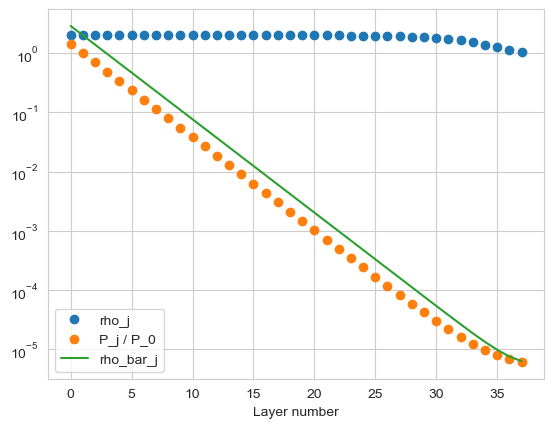

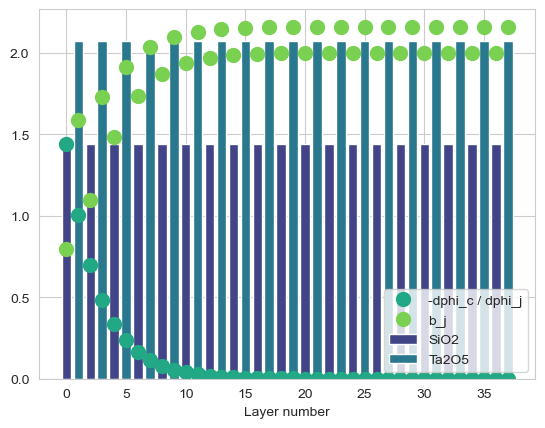

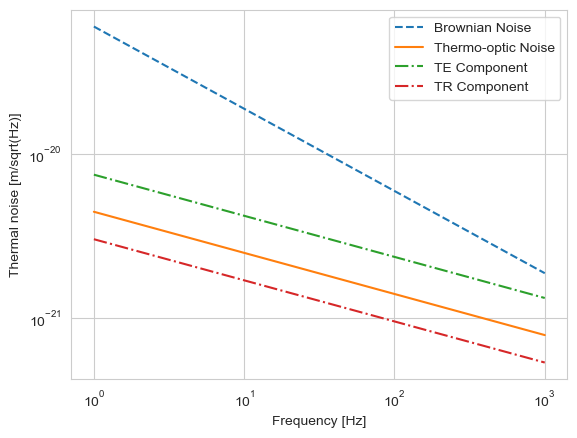

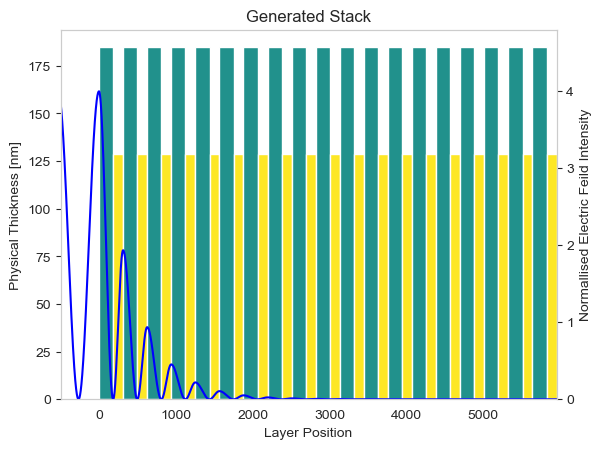

In [34]:
#set up interferometer parameters 

wBeam = 0.062;               # 6cm beam for aLIGO 
lambda_ = 1064e-9;           # laser wavelength

Temp = 293;                  # temperature - Room temperature 
f = np.logspace(0, 3, 100);  # frequencies for plotting

## set up aLIGO Coating Stack to benchmark functions 
num21 = 19  # number of 1-2 doublets (includes cap)
num34 = 0   # number of 3-4 doublets

# Using list comprehension to replicate the behavior of MATLAB's repmat
materialLayer = [1, 2] * num21 + [1, 2] * num34
materialLayer = np.array(materialLayer)

dOpt =np.ones(len(materialLayer))*0.25 
dOpt =np.array(dOpt)


materialParams = {
    1: {
        'name': 'SiO2',
        'n': 1.44,
        'a': 0,
        'alpha': 0.51e-6,
        'beta': 8e-6,
        'kappa': 1.38,
        'C': 1.64e6,
        'Y': 72e9,
        'prat': 0.17,
        'phiM': 4.6e-5,
        'k'   : 0 # right now assuming absorption of silica at 1064 is negligable. 
    },
    2: {
        'name': 'Ta2O5',
        'n': 2.07,
        'a': 2,
        'alpha': 3.6e-6,
        'beta': 14e-6,
        'kappa': 33,
        'C': 2.1e6,
        'Y': 140e9,
        'prat': 0.23,
        'phiM': 2.44e-4,
        'k'   : 1E-4 #measured by S.Tait for RLVIP tantala  at 1064nm  
    },

    999: {
        'name': 'air', 
        'n'   : 1,
        'alpha': np.NaN,
        'beta': np.NaN,
        'kappa': np.NaN,
        'C': np.NaN,
        'Y': np.NaN,
        'prat': np.NaN,
        'phiM': np.NaN
        
    
    }
    
}

noise_summary = YAM_CoatingBrownian.getCoatingThermalNoise(dOpt, materialLayer, materialParams, materialSub=1, lambda_=lambda_, f=f, wBeam=wBeam, Temp=Temp)

EFI, layer_idx , ds = EFI_tmm.CalculateEFI_tmm(dOpt ,materialLayer=materialLayer, materialParams=materialParams,lambda_ =lambda_ ,t_air = 500,polarisation='p' ,plots =True)

### Here im playing around with POCAL - probably dont run these cells as ive messed around with the POCAL source code to get this to work and i dont know how to push this to GIT 

SiO2
[{'material': 'Ag', 'wavelength': [200.0, 220.0, 230.0, 240.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312.0, 314.0, 316.0, 318.0, 320.0, 322.0, 324.0, 326.0, 328.0, 330.0, 332.0, 334.0, 336.0, 338.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0], 'real': [1.13, 1.32, 1.38, 1.37, 1.39, 1.39, 1.45, 1.47, 1.51, 1.51, 1.57, 1.61, 1.6, 1.64, 1.67, 1.65, 1.64, 1.62, 1.58, 1.54, 1.47, 1.4, 1.3, 1.19, 1.07, 0.92, 0.79, 0.64, 0.48, 0.3, 0.23, 0.2, 0.19, 0.1, 0.16, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.075, 0.055, 0.05, 0.055, 0.06, 0.07, 0.075, 0.08, 0.09, 0.1, 0.105, 0.11, 0.129, 0.48, 1.89, 4.15, 7.14, 10.69, 14.5], 'complex': [1.23, 1.29, 1.31, 1.33, 1.34, 1.34, 1.35, 1.34, 1.33, 1.31, 1.27, 1.24, 1.17, 1.08, 0.96, 0.82, 0.75, 0.68, 0.61, 0.54, 0.48, 0.43, 0.38, 0.34, 0.32,

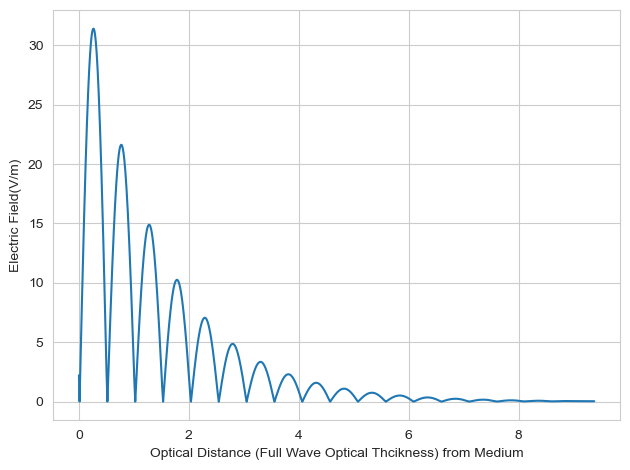

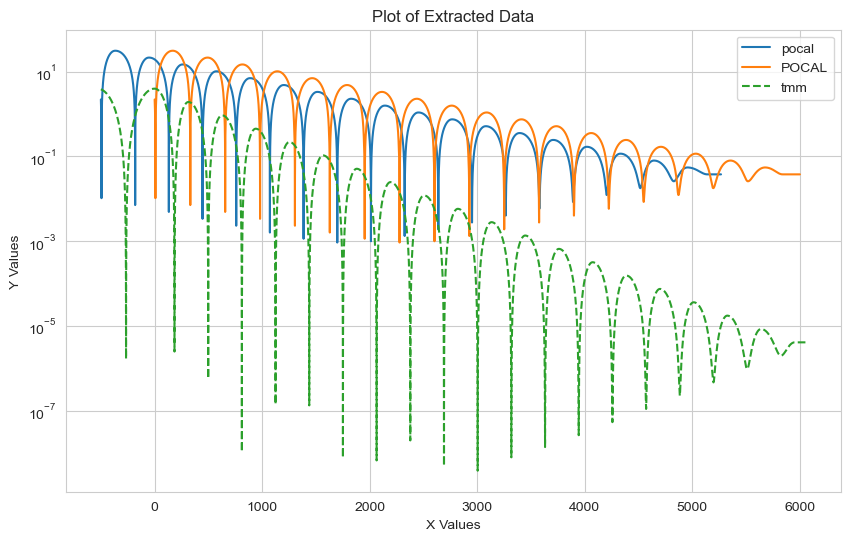

In [47]:
import pocal 

# Writing to the text file/

with open('aLIGO_pocal.txt', 'w') as file:
    for i in materialLayer:
        material = materialParams[i]
        thickness = lambda_ / (material['n'] * 4) * 1E9
        file.write(f"{material['name']}\t{thickness}\n")

os.chdir('/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pocal')

FileName ='/Users/simon/Dropbox/Python/Optics/CoatingDevelopment/aLIGO_pocal.txt'

prescription     = FileName 
angle_in_deg     = 0 
min_wave         = 200
max_wave         = 1999
resolution       = None 
ref_wave         = 1064 
opt_thick        = False 
refinement_type  = None 

test = pocal.pocal(prescription=FileName,angle_in_deg=0,min_wave=200,max_wave=2000,resolution=1,ref_wave=1064,opt_thick=False,refinement_type=None)


result_array, electricfield, FWOT_plot,PhysicalThickness = test.electricField()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(np.array(PhysicalThickness)-500, y_values,label = 'pocal')
plt.plot(np.linspace(0,6000,np.shape(electricfield)[0]), y_values,label ='POCAL')
plt.plot(ds, EFI,label = 'tmm',linestyle = '--')
plt.legend()
plt.title('Plot of Extracted Data')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.yscale('log')
plt.show()



(37037,)